# ASTR302 Lab 1: Introduction to Jupyter and Statistical Distributions

In this Lab you will be introduced to Jupyter notebooks and basic python.  You will use those skills to begin exploring the statistical distributions we discussed in lecture. Although you should work through the entire notebook, blue boxes highlight where there is more work to do.

## Jupyter Review

Each entry in a Jupyter notebook is called a cell. You can run cells in whatever order you select to. They are independent, but variable values are retained. 

You can run the contents of individual cells by selecting them and pressing **CTRL-Enter** or pressing the play arrow above. You can interrupt the excecution of the cell by pressing the stop (square) button above.

You can run the contents of individual cells AND add a new cell underneath by pressing **ALT-Enter**. 

You can delete a cell by selecting it and pressing **d** twice or selecting the scissors above.

You can add a text block like this cell by pressing **Esc-m** (or use the dropdown at the top and change from Code to Markdown.  This is useful for adding in notes that you want to remember.

You can find more information on Jupyter notebooks here: 
https://jupyter-notebook.readthedocs.io/en/stable/
***

## Python Review

The core python programming language provides a small number of built-in functions.  You can see a description of them here: https://docs.python.org/3/library/functions.html . Most of the high-level functions you will want for numerical data analysis are not built-in.  You access these by importing *packages*.  

You can import a package like this:

In [10]:
import astropy

This gives you access to the *astropy* package, which provides numerous astronomical utilities.  There are sub-packages within *astropy*, such as *constants*, which contains useful astronomical constants.  You import the subpackage like this:

In [11]:
import astropy.constants
c = astropy.constants.c  #Retrieve the speed of light, and store in variable 'c'
print(c) #Print a variable using the print object
print(c.value) #Get just the value

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018
299792458.0


You will frequently see someone do imports like this:

In [ ]:
from datetime import *

This says *from the datetime package, import everything directly into the current environment.* **This is very bad, and you should not do it.**  If two different packages have functions in them that are named the same thing, and if you import both of them like this, then they will overwrite each other and your code will be confusing.  

*There are a few exceptions to this rule, but you will likely not encounter them in this class.*

***

## Mathematics

To calculate things we need to import a mathematical package.  *numpy* is the standard.

In [12]:
import numpy as np

Note that I am both importing the 'numpy' package, and changing its name (in this session) to 'np'.  This is because I am lazy and typing 'np' is faster than typing 'numpy'.

You can find the documentation on the numpy package here: [https://numpy.org/devdocs/reference/index.html](https://numpy.org/devdocs/reference/index.html) . I found this by searching for 'numpy manual'.

Numpy allows you to create vector and matrix arrays:

In [13]:
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

Note that I did not use print(v).  Instead I asked python to give me information about the object itself.  It tells me that it is *type* array, and has elements [1, 2, 3, 4]

In [14]:
print(v)

[1 2 3 4]


Print just shows the contents (as a python list).

Now make a bigger array:

In [15]:
v = np.arange(0,10000,1) #This arange call creates a long array from 0 to 10000 with step size = 1

In [16]:
v

array([   0,    1,    2, ..., 9997, 9998, 9999])

Note that python doesn't display the entire array, only the ends --- and also note that python (and packages) have a wide range of utilities. So if you want to do something, it is highly likely a version of that already exists that you can access.

***

## Uniform Distribution

Let's use numpy to generate a uniform set of 100 random numbers from -10 to 10

In [17]:
sample = np.random.uniform(-10,10,100)

Let's examine that sample:

In [18]:
print(sample)

[ 7.87456349  4.15268275 -6.21213588  3.80652064  3.28153792  0.66744485
 -5.3311534  -1.46927503 -1.81127896 -8.74015615  1.16937254  5.44825167
 -3.30907084 -0.33294135  5.52571624 -0.92092225  1.74656037 -8.31170762
 -7.3267589   3.14766601  1.30282065 -9.09144734 -0.82920966 -0.26379074
  7.24691403 -9.50487356  8.0419452   7.03284343  5.12284683 -3.71497589
 -9.66557381 -6.49005569  7.10573108 -1.64094517 -1.24658723 -3.27366295
  0.8571349   9.69267638 -8.13398683 -5.95622422 -9.23183534 -3.60079075
  5.66437347 -4.55198174 -6.89234402  8.20522983 -0.63109036 -3.17675953
 -5.02783019  0.5910678  -6.70354553 -2.0952724  -1.37793993  7.85773147
  0.13080279  7.07729745 -2.87683301  5.45413417  4.37239708 -3.2767215
  0.7254641   9.86988392  1.76055001 -4.3491792  -1.67391537  2.54032708
 -2.35246318  5.60753822 -8.83541306  6.98261992 -1.59403067 -0.1274301
 -7.72693225  4.63734624 -7.03229314 -1.55259929  4.15017001  3.34828076
 -6.88410544  7.50396902  0.61139392 -9.22430593  0.6

Create a histogram of those random numbers, with one bin per integer value:

In [19]:
bins = np.linspace(-10,10,21)   #lower and upper limit, number of points

In [20]:
print(bins)

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


In [21]:
histogram, bins = np.histogram(sample, bins=bins)

In [22]:
print(histogram)

[ 8  4  3  5  5  3  6  3  8  6  9  5  2  5  5  6  2 10  3  2]


Why did we use linspace instead of array?  Read the documentation on numpy.linspace (for example here https://realpython.com/np-linspace-numpy/)

## Plotting

Now we can use the matplotlib package to plot this distribution.  First import it, and configure it to draw within the python notebook

In [23]:
import matplotlib.pyplot as plt
#%matplotlib inline

We want the plot to show bin centers halfway between the edge of each bin

In [24]:
bin_centers = 0.5*(bins[1:]+bins[:-1])

In [25]:
print(bin_centers)

[-9.5 -8.5 -7.5 -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5
  4.5  5.5  6.5  7.5  8.5  9.5]


Now setup the plot.

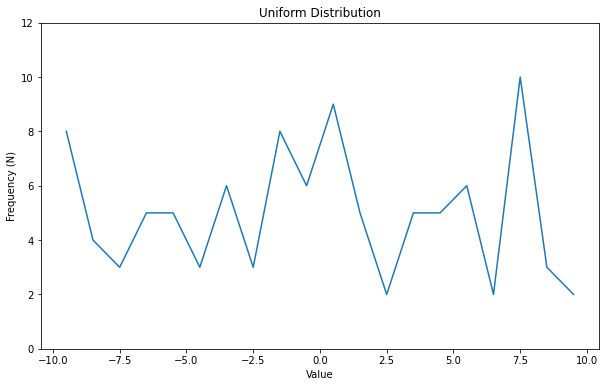

In [26]:
plt.figure(figsize=(10,6))

plt.plot(bin_centers, histogram)
plt.ylim(0,np.max(histogram*1.2))
plt.xlabel('Value')
plt.ylabel('Frequency (N)')
plt.title('Uniform Distribution')
plt.show()

That doesn't look very uniform.  Why? What happens if we increase the number of points to 10000?  Change the size of the sample in the original np.random.uniform call and re-run the notebook steps. This is your introduction to the concept of signal-to-noise. The fluctuations in the new plot are larger in value and yet they look smaller relative to the mean value. What is going on here? **This is an important concept to fully understand.**

When plotting histograms, it is useful for the plot to not play 'connect-the-dots'.  Rather, we want bar style plots.

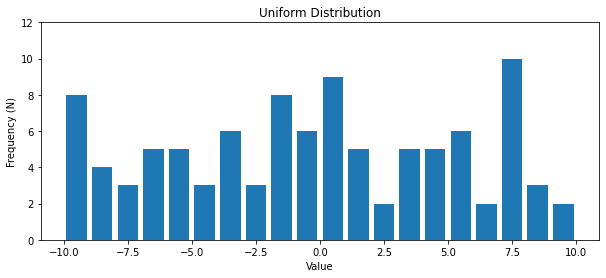

In [27]:
plt.figure(figsize=(10,4))   # sets size of plot, you can play with this
plt.bar(bin_centers, histogram)
plt.ylim(0,np.max(histogram*1.2))
plt.xlabel('Value')
plt.ylabel('Frequency (N)')
plt.title('Uniform Distribution')
plt.show()

## Gaussian Distribution

Now change from a uniform distribution to a normal (or Gaussian) distribution

In [54]:
sample = np.random.normal(0,2.5,10000)

Note that the function parameters for 'normal' are different than for uniform.  Use the numpy documentation to figure out what they are.

In [55]:
print(sample)

[-0.35253262  0.4635777  -2.63423134 ... -0.54978598 -3.5046882
  3.11327073]


In [56]:
histogram, bins = np.histogram(sample, bins=bins)

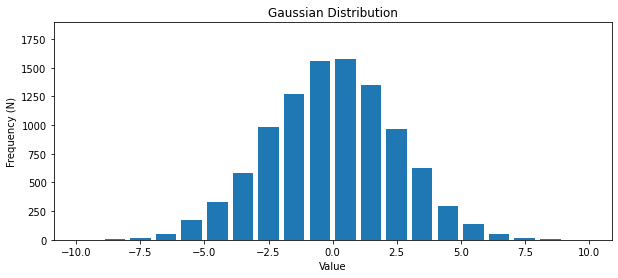

In [57]:
plt.figure(figsize=(10,4))
plt.bar(bin_centers, histogram)
plt.ylim(0,np.max(histogram*1.2))  # set y axis to give a little more headroom
plt.xlabel('Value')
plt.ylabel('Frequency (N)')
plt.title('Gaussian Distribution')
plt.show()

<div class="alert alert-info">Experiment with changing the standard deviation and center location of the distribution.  You may need to change the range of the bins.  Copy the above code and insert the required code above the plotting section. Reproduce below. </div>

In [69]:
sample = np.random.normal(-2,4,10000)
print(sample)

[-4.77039726  1.29037253 -0.6680857  ... -3.49094247  0.16798452
 -1.49107871]


In [70]:
bins = np.linspace(-10,6,10) 
histogram, bins = np.histogram(sample, bins=bins)
bin_centers = 0.5*(bins[1:]+bins[:-1])
print(bin_centers)

[-9.11111111 -7.33333333 -5.55555556 -3.77777778 -2.         -0.22222222
  1.55555556  3.33333333  5.11111111]


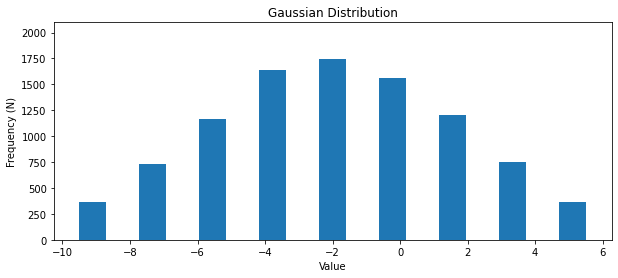

In [71]:
plt.figure(figsize=(10,4))
plt.bar(bin_centers, histogram)
plt.ylim(0,np.max(histogram*1.2))  # set y axis to give a little more headroom
plt.xlabel('Value')
plt.ylabel('Frequency (N)')
plt.title('Gaussian Distribution')
plt.show()

Note: the first number in the np.randomsample function is the center of the distribution or mu(mean). This number is the number that decides where the distribution will be centered. In my code above, I have my distribution centered at -2. The second number in that function is the standard deviation which tells you how spread out the data is in relation to the center or the mu(mean).when you change the center of the distribution, you also need to change the range of your bins so that even though the distribution is no longer centered at 0, the new range will be centered on your new mean.

## Binomial Distribution

The binomial distribution governs the outcome of an experiment where there are two possible outcomes.  This is the coin-flip experiment probability

$$P(x) = {n \choose {x}} p^x (1-p)^{n-x},$$

where $x$ is the number of positive outcomes out of $n$ trials, and $p$ is the probability of that positive outcome per trial (i.e., 0.5 for a coin toss).

numpy will generate a binomial distribution.  For a class of 20 students, each conducting the coin flip experiment 10 times:

In [135]:
students = 20
tosses = 10
p = 0.5
samples = np.random.binomial(tosses,p,students)

In [136]:
print(samples)

[7 2 4 6 5 4 5 5 7 5 8 1 4 5 5 5 4 6 6 9]


In [137]:
bins = np.linspace(0,tosses,tosses+1)

In [138]:
print(bins)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [139]:
bin_centers = 0.5*(bins[1:]+bins[:-1])

In [140]:
histogram, bins = np.histogram(samples, bins=bins, density=False)

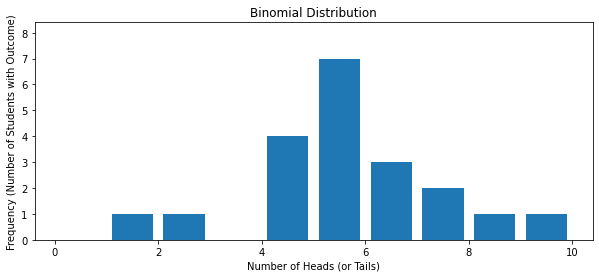

In [141]:
plt.figure(figsize=(10,4))
plt.bar(bin_centers, histogram,)
plt.ylim(0,np.max(histogram*1.2))
plt.xlabel('Number of Heads (or Tails)')
plt.ylabel('Frequency (Number of Students with Outcome)')
plt.title('Binomial Distribution')
plt.show()

<div class="alert alert-info">What happens when you increase the number of experiements (either number of students or number of tosses)? Answer below. </div>

In [142]:
students = 50
tosses = 20
p = 0.5
samples = np.random.binomial(tosses,p,students)

In [143]:
print(samples)

[14 10  8 10  6 12 10 14  6 13 11 11  8 10  7  8  8 12  8 10  9 12 12 13
 11  8  9 10 12 10 11  9 13  9  5 12  9  8  9  9 13 11 10  9 15  7 12  7
  6 11]


In [144]:
bins = np.linspace(0,tosses,tosses+1)

In [145]:
print(bins)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


In [146]:
bin_centers = 0.5*(bins[1:]+bins[:-1])

In [147]:
histogram, bins = np.histogram(samples, bins=bins, density=False)

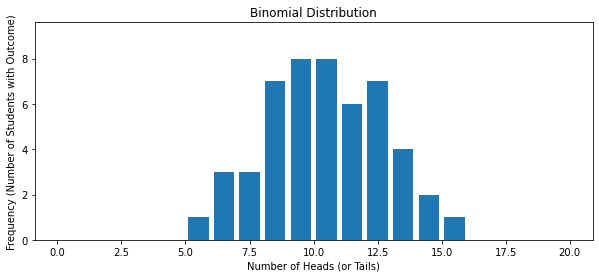

In [148]:
plt.figure(figsize=(10,4))
plt.bar(bin_centers, histogram,)
plt.ylim(0,np.max(histogram*1.2))
plt.xlabel('Number of Heads (or Tails)')
plt.ylabel('Frequency (Number of Students with Outcome)')
plt.title('Binomial Distribution')
plt.show()

Answer: When you increase the number of students, the frequency(y-axis) increases and makes more of a normal distribution shape(bell shape) centered at half the value of how many trials. When you increase the number of trials(tosses), the frequency(decreases) due to the fact that you are increasing the number of trials but not the number of students undergoing the experiment. This creates a skewed distribution.

## Poisson Distribution

The Poisson distribution gives you the probability of encountering a certain number of events in a given period, if those events are occuring at a known constant mean rate.  This is the distribution that governs most 'counting' situations, including the collection of photons from stars!  This is also the limit of the binomial distribution for large N and small p.

The distribution has one parameter: the average number of events, often expressed as $\mu$:

$$ P(x) = \frac{\mu^x}{x!} e^{-\mu}$$

Use the Poisson generator in numpy to generate a sample function with a mean rate of 10 and 100 events.

In [149]:
mu = 10
samples = np.random.poisson(mu, 10000)

In [150]:
print(samples)

[13 12  7 ... 11 13 11]


In [151]:
bins = np.linspace(min(samples)-1,1.1*max(samples),30)  # written to adjust to changes in lambda

In [152]:
histogram, bins = np.histogram(samples, bins=bins)

In [153]:
bin_centers = 0.5*(bins[1:]+bins[:-1])

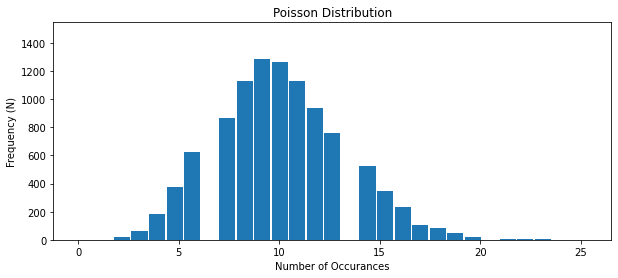

In [154]:
plt.figure(figsize=(10,4))
plt.bar(bin_centers, histogram)
plt.ylim(0,np.max(histogram*1.2))
plt.xlabel('Number of Occurances')
plt.ylabel('Frequency (N)')
plt.title('Poisson Distribution')
plt.show()

Increase the number of samples to smooth out the function.

<div class="alert alert-info">What happens to the Poisson distribution for very low rates (try a value of 1)? What happens at very large mu (try a value of 100) Answer both below. </div>

In [52]:
mu = 100
samples = np.random.poisson(mu, 10000)

In [53]:
print(samples)

[ 85 100  86 ... 105  99  95]


In [54]:
bins = np.linspace(min(samples)-1,1.1*max(samples),30)  # written to adjust to changes in lambda

In [55]:
histogram, bins = np.histogram(samples, bins=bins)

In [56]:
bin_centers = 0.5*(bins[1:]+bins[:-1])

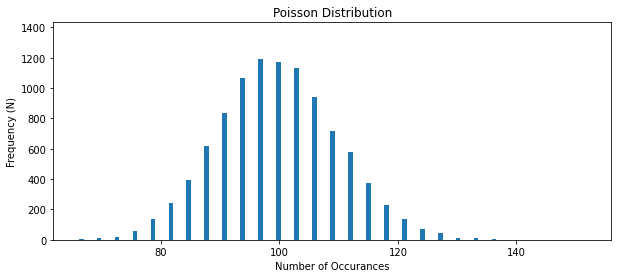

In [57]:
plt.figure(figsize=(10,4))
plt.bar(bin_centers, histogram)
plt.ylim(0,np.max(histogram*1.2))
plt.xlabel('Number of Occurances')
plt.ylabel('Frequency (N)')
plt.title('Poisson Distribution')
plt.show()

Answer: At very low rates, when mu = 1, the Poisson distribution becomes highly concentrated around the value 0, since the probability of observing more than a few events becomes quite small(in this case values around 3 amd 4 are very small). Creates a very right skewed distribution due to the fact most of the data sits on the right. When mu = 100, the Poisson distribution becomes more spread out and resembles a Gaussian(normal) distribution. However, as mu increases, and the distribution spreads out, the frequency for number of occurances decreases.

***

## Conclusion: 

 <div class="alert alert-info">Save your notebook.  Append your LastNameFirstInitial to the filename, and email it to me  at uaastr302.gmail.com</div>